In [1]:
import os
import pathlib

import geopandas as gpd
%pip install geoviews
import geoviews as gv
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Create data directory in the home folder
data_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    # Earth analytics data directory
    'earth-analytics',
    'data',
    # Project directory
    'whale-migration',
)
data_dir
os.makedirs(data_dir, exist_ok=True)

Source for marine ecoregion boundaries: https://databasin.org/datasets/3b6b12e7bcca419990c9081c0af254a2/

Citation:
Spalding MD, Fox HE, Allen GR, Davidson N, Ferdaña ZA, Finlayson M, Halpern BS, Jorge MA, Lombana A, Lourie SA, Martin KD, McManus E, Molnar J, Recchia CA, Robertson J (2007) Marine Ecoregions of the World: a bioregionalization of coast and shelf areas. BioScience 57: 573-583.

In [4]:
# Define eco_path
eco_path = 'Marine_ecosystems.zip!MEOW/meow_ecos.shp'

# Open up the ecoregions boundaries
eco_gdf = (
    gpd.read_file(eco_path)
    [['ECO_CODE', 'ECOREGION', 'geometry']]
    .rename(columns={
        'ECO_CODE': 'ecoregion_ID',
        'ECOREGION': 'name',
    })
    .set_index('ecoregion_ID')
)

eco_gdf['area'] = eco_gdf.to_crs(9822).geometry.area/1000000

# Plot the ecoregions to check download
eco_gdf

,name,geometry,area
ecoregion_ID,,,
20192.0,Agulhas Bank,"POLYGON ((28.35993 -36.64435, 28.2835 -36.6769...",3.420362e+06
20053.0,Aleutian Islands,"MULTIPOLYGON (((-173.39419 55.59807, -168.5559...",5.386821e+06
20072.0,Amazonia,"POLYGON ((-41.13012 0.47319, -41.03905 0.4439,...",2.564858e+06
20194.0,Amsterdam-St Paul,"POLYGON ((77.52994 -34.5229, 77.92307 -34.5450...",2.746581e+06
20228.0,Amundsen/Bellingshausen Sea,"POLYGON ((-72.94222 -74.30962, -79.88636 -75.1...",5.643643e+08
...,...,...,...
25034.0,Ionian Sea,"POLYGON ((18.28997 40.28222, 18.46579 40.19296...",4.582846e+05
25031.0,Aegean Sea,"POLYGON ((26.80983 41.87778, 29.19196 41.03381...",6.136867e+05
25036.0,Alboran Sea,"POLYGON ((0.32179 32.44572, 0.23032 32.38912, ...",3.578930e+05


In [5]:
eco_gdf.head()

,name,geometry,area
ecoregion_ID,,,
20192.0,Agulhas Bank,"POLYGON ((28.35993 -36.64435, 28.2835 -36.6769...",3.420362e+06
20053.0,Aleutian Islands,"MULTIPOLYGON (((-173.39419 55.59807, -168.5559...",5.386821e+06
20072.0,Amazonia,"POLYGON ((-41.13012 0.47319, -41.03905 0.4439,...",2.564858e+06
20194.0,Amsterdam-St Paul,"POLYGON ((77.52994 -34.5229, 77.92307 -34.5450...",2.746581e+06
20228.0,Amundsen/Bellingshausen Sea,"POLYGON ((-72.94222 -74.30962, -79.88636 -75.1...",5.643643e+08


<Axes: >

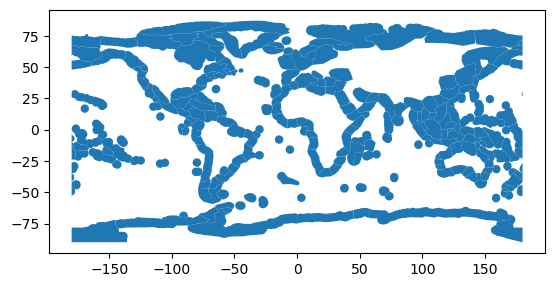

In [ ]:
# Plot the ecoregions to check download
eco_gdf.plot()

# Title

## Species description
why did I choose this species? Is there any relevant information about it that makes its migration interesting?

## Data description
ecoregion
GBIF occurrences
... with citations
& describe how the data was collected etc

## Methods descriptions
Normalization -- Why is it necessary, how did I do it?
We normalized by sampling effort in the ecoregion, by month, and by area.

<embed type ="text/html" src="migrathion.html" width="900" height="900">

## Plot headline
Plot description, discussion, conclusion
Ideally link back to the early text for context.